In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from pylab import rcParams

In [2]:
sns.set(style="ticks")
from pylab import rcParams

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [3]:
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 40)

In [4]:
%matplotlib inline

In [5]:
#Functionality / alerts code
location = input("Enter your location:")
print(location)

temperature = 0
#print(temperature)
water_temps = []
#print(water_temps)

#Generates an example dataset
for i in range(0, 24):
    temperature = int(input("Temperature(℃)"))
    print(temperature,"℃")
    water_temps.append(temperature)

Enter your location:Mahurangi Harbour
Mahurangi Harbour
Temperature(℃)23
23 ℃
Temperature(℃)20
20 ℃
Temperature(℃)32
32 ℃
Temperature(℃)18
18 ℃
Temperature(℃)31
31 ℃
Temperature(℃)10
10 ℃
Temperature(℃)20
20 ℃
Temperature(℃)22
22 ℃
Temperature(℃)11
11 ℃
Temperature(℃)22
22 ℃
Temperature(℃)28
28 ℃
Temperature(℃)23
23 ℃
Temperature(℃)27
27 ℃
Temperature(℃)13
13 ℃
Temperature(℃)20
20 ℃
Temperature(℃)21
21 ℃
Temperature(℃)34
34 ℃
Temperature(℃)32
32 ℃
Temperature(℃)9
9 ℃
Temperature(℃)14
14 ℃
Temperature(℃)15
15 ℃
Temperature(℃)17
17 ℃
Temperature(℃)10
10 ℃
Temperature(℃)25
25 ℃


In [6]:
print(water_temps)

[23, 20, 32, 18, 31, 10, 20, 22, 11, 22, 28, 23, 27, 13, 20, 21, 34, 32, 9, 14, 15, 17, 10, 25]


In [7]:
temperature_data = pd.DataFrame(water_temps, columns = ['Temperature(℃)'])

In [8]:
temperature_data

,Temperature(℃)
0,23
1,20
2,32
3,18
4,31
5,10
6,20
7,22
8,11
9,22


In [9]:
#temperature_data.to_csv("../datasets/temperature_data_test.csv")

Text(0.5, 1.0, 'Hourly Temperature Of The Water in the Mahurangi Harbour Region Over A 24 Hour Period')

C:\Users\filip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\filip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


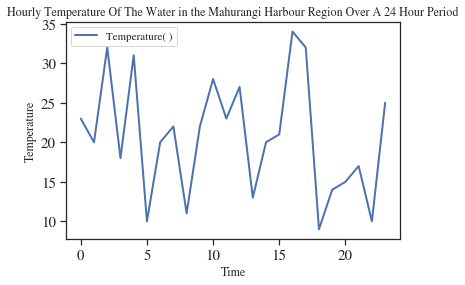

In [10]:
temperature_data.plot()
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.title('Hourly Temperature Of The Water in the {} Region Over A 24 Hour Period'.format(location))

In [11]:
alerts = []
for temp in water_temps:
    if temp < 12 or temp > 35:
        print("Temperature outside of desirable range")
        alerts.append(temp)
    else:
        print("Temperature within desirable range")

Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range


In [12]:
print(alerts)

[10, 11, 9, 10]


In [13]:
pH = 0
print(pH)
pHs = []
print(pHs)

#Generates an example dataset
for i in range(0, 24):
    pH = int(input("pH:"))
    print(pH)
    pHs.append(pH)

0
[]
pH:7
7
pH:3
3
pH:4
4
pH:5
5
pH:6
6
pH:8
8
pH:8
8
pH:9
9
pH:6
6
pH:3
3
pH:5
5
pH:10
10
pH:5
5
pH:5
5
pH:7
7
pH:9
9
pH:8
8
pH:8
8
pH:7
7
pH:8
8
pH:8
8
pH:6
6
pH:8
8
pH:9
9


In [14]:
print(pHs)

[7, 3, 4, 5, 6, 8, 8, 9, 6, 3, 5, 10, 5, 5, 7, 9, 8, 8, 7, 8, 8, 6, 8, 9]


In [15]:
pH_data = pd.DataFrame(pHs, columns = ['pH'])
pH_data

,pH
0,7
1,3
2,4
3,5
4,6
5,8
6,8
7,9
8,6
9,3


Text(0.5, 1.0, 'Hourly pH Of The Water in the Mahurangi Harbour Region Over A 24 Hour Period')

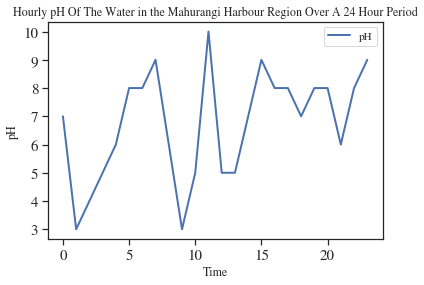

In [16]:
pH_data.plot()
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('pH')
plt.xlabel('Time')
plt.title('Hourly pH Of The Water in the {} Region Over A 24 Hour Period'.format(location))

In [17]:
pH_alerts = []
for pH in pHs:
    if pH < 4 or pH > 11:
        print("pH outside of desirable range")
        pH_alerts.append(pH)
    else:
        print("pH within desirable range")

pH within desirable range
pH outside of desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH outside of desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range


In [18]:
print(pH_alerts)

[3, 3]


In [19]:
oyster_data = pd.concat([temperature_data, pH_data], axis = 1)

In [20]:
oyster_data

,Temperature(℃),pH
0,23,7
1,20,3
2,32,4
3,18,5
4,31,6
5,10,8
6,20,8
7,22,9
8,11,6
9,22,3


In [21]:
oyster_data.to_csv("../datasets/oyster_data.csv")

<AxesSubplot:>

C:\Users\filip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\filip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


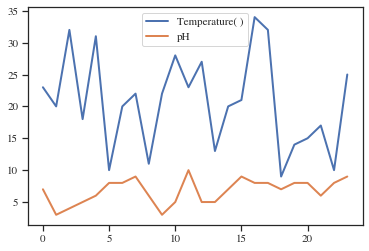

In [22]:
oyster_data.plot()